# Ford Gobike
## by Lamyaa Sameh

## Preliminary Wrangling

> This data set includes information about individual rides made 
in a bike-sharing system covering the greater San Francisco 
Bay area.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from matplotlib import pyplot
import datetime

%matplotlib inline

In [2]:
# Read from master dataset
df_gobike = pd.read_csv('201902-fordgobike-tripdata.csv')
# display few records randomly 
df_gobike.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [3]:
df_gobike.start_station_id.nunique(),df_gobike.start_station_name.nunique()

(329, 329)

In [4]:
# structure of the dataset
df_gobike.shape

(183412, 16)

In [5]:
# features of the dataset
df_gobike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [6]:
df_gobike.nunique()

duration_sec                 4752
start_time                 183401
end_time                   183397
start_station_id              329
start_station_name            329
start_station_latitude        334
start_station_longitude       335
end_station_id                329
end_station_name              329
end_station_latitude          335
end_station_longitude         335
bike_id                      4646
user_type                       2
member_birth_year              75
member_gender                   3
bike_share_for_all_trip         2
dtype: int64

In [7]:
sum(df_gobike.duplicated())

0

In [8]:
df_gobike.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

### Tidiness issues :

#### 1- Missing values in member_birth_year ,member_gender, start&end_station_name ,start&end_station_id


In [9]:
df_gobike.dropna(inplace=True)

In [10]:
df_gobike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             174952 non-null  int64  
 1   start_time               174952 non-null  object 
 2   end_time                 174952 non-null  object 
 3   start_station_id         174952 non-null  float64
 4   start_station_name       174952 non-null  object 
 5   start_station_latitude   174952 non-null  float64
 6   start_station_longitude  174952 non-null  float64
 7   end_station_id           174952 non-null  float64
 8   end_station_name         174952 non-null  object 
 9   end_station_latitude     174952 non-null  float64
 10  end_station_longitude    174952 non-null  float64
 11  bike_id                  174952 non-null  int64  
 12  user_type                174952 non-null  object 
 13  member_birth_year        174952 non-null  float64
 14  memb

 #### 2- Start time and end time are object , should be converted to timestamp 

In [11]:
# convert the data type of start_time and end_time to datetime
df_gobike['start_time'] = pd.to_datetime(df_gobike['start_time'])

In [12]:
df_gobike['end_time'] = pd.to_datetime(df_gobike['end_time'])

In [13]:
df_gobike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  float64       
 4   start_station_name       174952 non-null  object        
 5   start_station_latitude   174952 non-null  float64       
 6   start_station_longitude  174952 non-null  float64       
 7   end_station_id           174952 non-null  float64       
 8   end_station_name         174952 non-null  object        
 9   end_station_latitude     174952 non-null  float64       
 10  end_station_longitude    174952 non-null  float64       
 11  bike_id                  174952 non-null  int64         
 12  user_type       

#### 3- Member birth year is foat ,should be change to integer 

In [14]:
# convert the data type of member_birth_year from float64 to int.
df_gobike['member_birth_year'] = df_gobike['member_birth_year'].astype('int64')

In [15]:
df_gobike.head(3)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984,Male,No
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972,Male,No
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989,Other,No


In [16]:
df_gobike.member_birth_year.dtype

dtype('int64')

In [17]:
df_gobike['member_birth_year'].value_counts()

1988    10214
1993     9323
1989     8967
1990     8640
1991     8484
        ...  
1878        1
1930        1
1928        1
1927        1
1910        1
Name: member_birth_year, Length: 75, dtype: int64

### What is the structure of your dataset?

> This dataset contains 174,952 rows and 16 columns 

### What is/are the main feature(s) of interest in your dataset?

> The features of interest are: duration_sec,user_type, member_gender and member_birth_year.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> The features that will help support :start_time, end_time to investigate about the average trip long.
> i expect an effect on the average trip time and the most trip taken by the type of user as Customer or Subscriber.
   

## Univariate Exploration



I'll start by looking at the distribution of the main variable of interest: Duration.

In [18]:
df_gobike.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000
mean,704.002744,139.002126,37.771220,-122.351760,136.604486,37.771414,-122.351335,4482.587555,1984.803135
std,1642.204905,111.648819,0.100391,0.117732,111.335635,0.100295,0.117294,1659.195937,10.118731
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,323.000000,47.000000,37.770407,-122.411901,44.000000,37.770407,-122.411647,3799.000000,1980.000000
50%,510.000000,104.000000,37.780760,-122.398279,101.000000,37.781010,-122.397437,4960.000000,1987.000000
75%,789.000000,239.000000,37.797320,-122.283093,238.000000,37.797673,-122.286533,5505.000000,1992.000000
max,84548.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


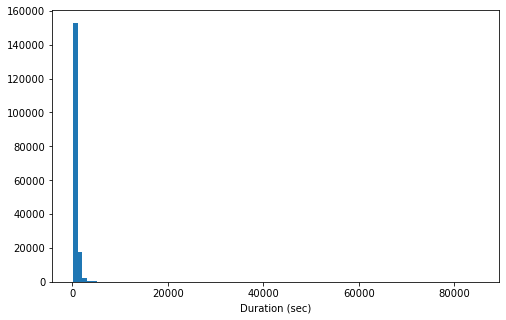

In [19]:
plt.figure(figsize=[8, 5])
# set bins
binsize = 1000
bins = np.arange(61, df_gobike['duration_sec'].max()+binsize, binsize)
# Plot the distribution of duration_sec
plt.hist(data = df_gobike, x = 'duration_sec', bins = bins)
# title and labels
plt.xlabel('Duration (sec)')
plt.show()

Comment 1: My initial plots shows that trip duration follows a highly skewed distribution. that's why i descided to use log scaling 

In [20]:
np.log10(df_gobike['duration_sec'].describe())

count    5.242919
mean     2.847574
std      3.215427
min      1.785330
25%      2.509203
50%      2.707570
75%      2.897077
max      4.927103
Name: duration_sec, dtype: float64

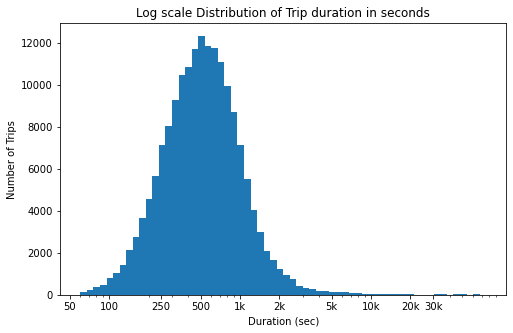

In [21]:
# set bins
log_binsize = 0.05
bins = 10 ** np.arange(1.78, np.log10(df_gobike['duration_sec'].max()+log_binsize), log_binsize)

plt.figure(figsize=[8, 5])

# Plot the distribution of duration_sec
plt.hist(data = df_gobike, x = 'duration_sec', bins = bins)
plt.xscale('log')
plt.xticks([50, 100, 250, 500, 1e3, 2e3, 5e3, 1e4, 2e4, 3e4],[50, 100, 250, 500, '1k', '2k', '5k', '10k', '20k', '30k'])

# title and labels
plt.title('Log scale Distribution of Trip duration in seconds')
plt.xlabel('Duration (sec)')
plt.ylabel('Number of Trips');

Comment 2 : When i plotted on a log-scale, the duration distribution looks unimodal , with one peak around 500 sec which is 9 mins , the minimum trip is 61 seconds and the maximum is 23 hours.

Next up, the first predictor variable of interest: User type.

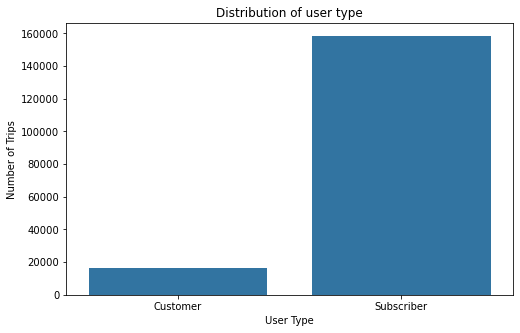

In [22]:
plt.figure(figsize=[8, 5])

# Plot user_type on bar
default_color = sb.color_palette()[0]
sb.countplot(data = df_gobike, x = 'user_type', color = default_color)

# title and labels
plt.title('Distribution of user type')
plt.xlabel('User Type')
plt.ylabel('Number of Trips');

Comment 3: in case of the user type , by using the bar shart ;i found that the number of subcribers is way far than customers, 
it's more than 140,000 user difference.

I'll now move on to the other variables in the dataset: Member gender

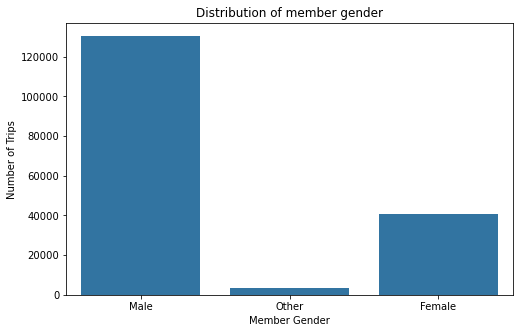

In [23]:
plt.figure(figsize=[8, 5])
# set the base color
default_color = sb.color_palette()[0]

# plot to see the distribution of the gender
sb.countplot(data = df_gobike, x = 'member_gender', color = default_color)

# title and labels
plt.title('Distribution of member gender')
plt.xlabel('Member Gender')
plt.ylabel('Number of Trips');

Comment 4: the plot shows that male are using the Gobike share more than female.More that 120k of males, in the other hand females are around 40k, in the same time a few of user did not specify their gender.

I'll now look at the other features in the data to see if any of them hold interesting properties.

The user's age

In [24]:
df_gobike.member_birth_year.describe()

count    174952.000000
mean       1984.803135
std          10.118731
min        1878.000000
25%        1980.000000
50%        1987.000000
75%        1992.000000
max        2001.000000
Name: member_birth_year, dtype: float64

In [25]:
# create age feature based on member_birth_year
# the value in age is the age of the members as of the current year.
df_gobike['age'] = datetime.datetime.now().year - df_gobike.member_birth_year
df_gobike.age.value_counts()

33     10214
28      9323
32      8967
31      8640
30      8484
       ...  
94         1
93         1
111        1
91         1
143        1
Name: age, Length: 75, dtype: int64

In [26]:
df_gobike['age'].describe()

count    174952.000000
mean         36.196865
std          10.118731
min          20.000000
25%          29.000000
50%          34.000000
75%          41.000000
max         143.000000
Name: age, dtype: float64

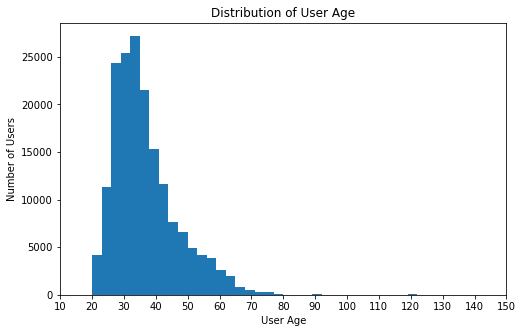

In [27]:
plt.figure(figsize=[8, 5])

# set the figure size
bins = np.arange(20, df_gobike.age.max()+1, 3)
default_color = sb.color_palette()[0]
# create x ticks
x_ticks = np.arange(10, df_gobike.age.max()+10, 10)

# Let's plot the age of the users
plt.hist(data=df_gobike , x = 'age', color=default_color , bins=bins)

# title and labels
plt.xticks(x_ticks)
plt.title('Distribution of User Age')
plt.xlabel('User Age')
plt.ylabel('Number of Users');

Comment 5: We can see that age group of 25-35 have the wide range of spectrum for the number of trips, in which user age of 30 being the peak in number of users having the trip.

The days of the week 

In [28]:
# create a new column start_day
df_gobike['start_day'] = df_gobike.start_time.dt.dayofweek

In [29]:
# convert the newly created into categorical type
df_gobike['start_day'] = df_gobike['start_day'].astype('category')

In [30]:
# Group by start_day to get the count
day_count = df_gobike.groupby('start_day').count().start_time
day_count

start_day
0    25641
1    30584
2    28426
3    33712
4    27663
5    14414
6    14512
Name: start_time, dtype: int64

In [31]:
df_gobike.head(1)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,age,start_day
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984,Male,No,37,3


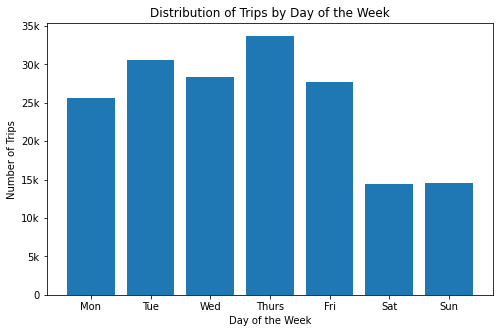

In [32]:
plt.figure(figsize=[8, 5])

# Plot the day distribution on bar
plt.bar(day_count.index , day_count.values)

# get the current tick locations and labels
labels = plt.xticks()
labels = ['Mon','Tue','Wed','Thurs','Fri','Sat','Sun']
 

plt.xticks(range(7), labels=labels, rotation=0)
plt.yticks(np.arange(0, 40000, 5000), [0, '5k', '10k', '15k', '20k', '25k', '30k', '35k'])  

# title and labels
plt.title('Distribution of Trips by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Trips');

Comment 6: Weekdays have more number of trips than weekends
Especially, the trip count for mid three days of the week (Tue, Wed, Thurs) ranges between 30k and 35k

Time of the day

In [33]:
# create separate column for start and end hour
df_gobike['start_hour'] = df_gobike.start_time.dt.hour
# groupby start_hour
hour_count = df_gobike.groupby('start_hour').count().start_time

In [34]:
hour_count

start_hour
0       893
1       525
2       355
3       164
4       227
5       866
6      3293
7     10231
8     20227
9     15204
10     7970
11     7461
12     8220
13     8098
14     7677
15     8646
16    13473
17    20904
18    16118
19     9424
20     6211
21     4400
22     2793
23     1572
Name: start_time, dtype: int64

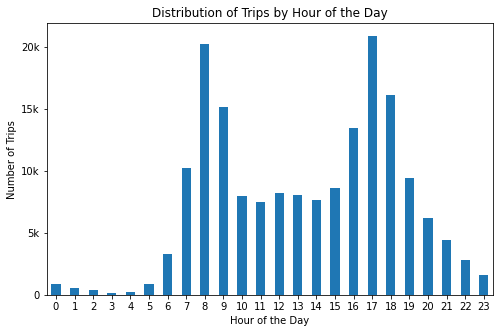

In [35]:
plt.figure(figsize=[8, 5])

# Plot the hour distribution on bar
hour_count.plot(kind='bar')

# set ticks
plt.xticks(rotation=0)
plt.yticks(np.arange(0, 25000, 5000),[0,'5k', '10k', '15k', '20k'])

# title and labels
plt.title('Distribution of Trips by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Trips');

Comment 7 : We can see that the peak hours are 7am - 9am and 4pm - 6pm; that's can describe that most of the user are using bike as a way of transportation to work.

Month of the year

In [36]:
df_gobike['start_month'] = df_gobike.start_time.dt.month

In [37]:
month_count = df_gobike.groupby('start_month').count().start_time
month_count

start_month
2    174952
Name: start_time, dtype: int64

Comment 8: This dataset is done specifically in February 2019.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> I made some investigation about many variables, the average duration of the trips , the frequency of the trips daily and hourly , the frequency of usage of male and female of GObike and for the customers and subcribers usage. 
the data of duration was highly skewed and that needs a log-scale transformation.
During analysing the age ,i found a huge range of outliers. 



### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> During accessing the data ,i found some tidiness issues like : 1- Missing values in member_birth_year ,member_gender, start&end_station_name ,start&end_station_id. 2- Start time and end time are object , should be converted to timestamp. 3-Member birth year is foat ,should be change to integer.

## Bivariate Exploration



In [38]:
df_gobike.head(1)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,age,start_day,start_hour,start_month
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984,Male,No,37,3,17,2


In [39]:
numeric_vars = ['duration_sec', 'start_hour', 'age']
categoric_vars = ['member_gender', 'user_type','start_day']

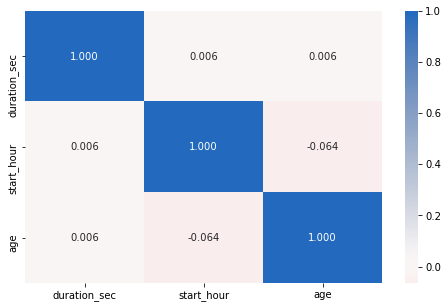

In [40]:
plt.figure(figsize = [8, 5])
sb.heatmap(df_gobike[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

Let's look at the correlation between different variable in here.

User type and the user gender correlation 

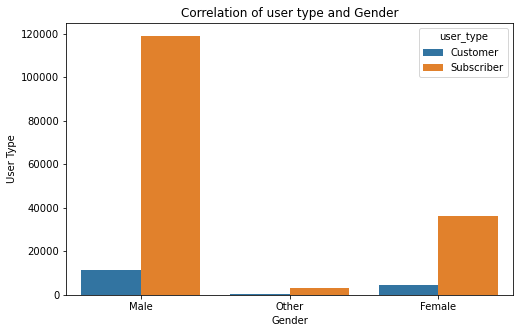

In [41]:
# set figure size
plt.figure(figsize=[8, 5])

# box plot between gender and trip duration
sb.countplot(data = df_gobike, x = 'member_gender', hue = 'user_type')

# labels and title
plt.title('Correlation of user type and Gender')
plt.xlabel('Gender')
plt.ylabel('User Type');

Comment 9: The plot shows that most of the male who use the application tend to be subscribers.

Trip duration and User type

In [42]:
df_gobike.duration_sec.describe()

count    174952.000000
mean        704.002744
std        1642.204905
min          61.000000
25%         323.000000
50%         510.000000
75%         789.000000
max       84548.000000
Name: duration_sec, dtype: float64

As the duration is wide spread at lower spectrum, let's trim the range to 3.5k seconds

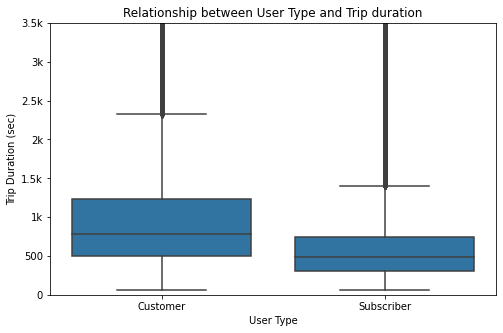

In [43]:
# set figure size
plt.figure(figsize=[8, 5])

base_color = sb.color_palette()[0]

# box plot between user type and trip duration
sb.boxplot(data =df_gobike, x = 'user_type', y = 'duration_sec',color=base_color)

# set ticks
plt.yticks(np.arange(0, 3500+1, 500),[0,500,'1k','1.5k','2k','2.5k','3k','3.5k'])
plt.ylim(0,3500);

# labels and title
plt.xlabel('User Type')
plt.ylabel('Trip Duration (sec)')
plt.title('Relationship between User Type and Trip duration');

comment 10: The number of trips are greater for Subscriber, the trip duration is greater for Customer.

User age and trip duration

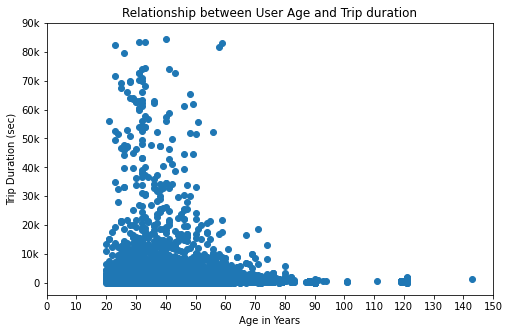

In [66]:
# set figure size
plt.figure(figsize=[8, 5])

# scatter plot between user age and trip duration
plt.scatter(data=df_gobike, x='age', y='duration_sec');

# set ticks
plt.xticks(np.arange(0, df_gobike.age.max()+10, 10))
plt.yticks(np.arange(0, df_gobike.duration_sec.max()+10000, 10000),[0,'10k','20k','30k','40k','50k','60k','70k','80k','90k'])

# labels and title
plt.xlabel('Age in Years')
plt.ylabel('Trip Duration (sec)')
plt.title('Relationship between User Age and Trip duration');

the plot shows that most of the users are under age of 80 ,and highly concentrated in 500 secs.So let's change the limt of both,X and Y axes.

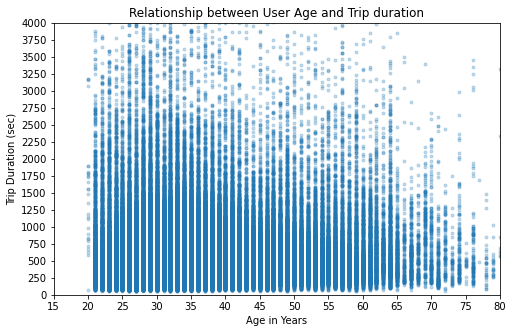

In [64]:
# set figure size
plt.figure(figsize=[8, 5])

# scatter plot between user age and trip duration
plt.scatter(data=df_gobike, x='age', y='duration_sec', alpha=0.25, marker='.');

# set ticks
plt.xticks(np.arange(15, 80+5, 5))
plt.yticks(np.arange(0, 5000+500, 250))
plt.xlim(15,80)
plt.ylim(0,4000)

# labels and title
plt.xlabel('Age in Years')
plt.ylabel('Trip Duration (sec)')
plt.title('Relationship between User Age and Trip duration');

comment 11: the plot shows that the high bike users are aged between 25 - 40, having average trip duration around 500 seconds.

Day of the week and Trip duration

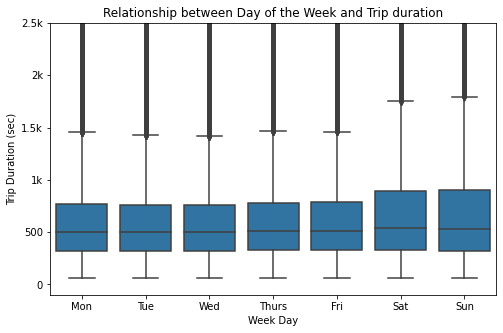

In [46]:
# set figure size
plt.figure(figsize=[8, 5])

base_color = sb.color_palette()[0]

# box plot between day of the week and trip duration
sb.boxplot(data = df_gobike, x = 'start_day', y = 'duration_sec',color=base_color)

labels = ['Mon','Tue','Wed','Thurs','Fri','Sat','Sun']
# set ticks
plt.xticks(range(7), labels=labels, rotation=0)
plt.yticks(np.arange(0, 3000+1, 500),[0,500,'1k','1.5k','2k','2.5k','3k'])

plt.ylim(-100,2500)

# labels and title
plt.xlabel('Week Day')
plt.ylabel('Trip Duration (sec)')
plt.title('Relationship between Day of the Week and Trip duration');

comment 12: The number of trips are greater for weekdays, the duration in seconds is greater for weekends(Sat,Sun)

User type and day of the week

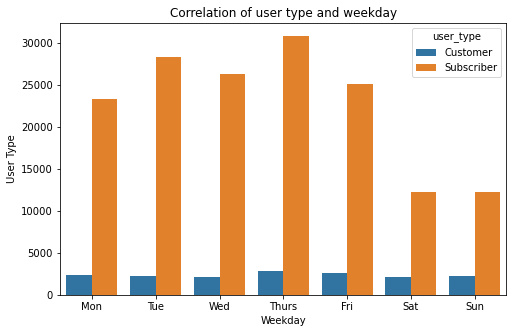

In [47]:
# set figure size
plt.figure(figsize=[8, 5])

#cluster plot between day and user type
sb.countplot(data = df_gobike, x = 'start_day', hue = 'user_type')
labels = ['Mon','Tue','Wed','Thurs','Fri','Sat','Sun']
# set ticks
plt.xticks(range(7), labels=labels, rotation=0)

# labels and title
plt.title('Correlation of user type and weekday')
plt.xlabel('Weekday')
plt.ylabel('User Type');

Comment 13: On thursdays the number of Customers is relatively increased than the other days. Subcribers usage is decreasing during weekends rather than weekadays.

Age and user type

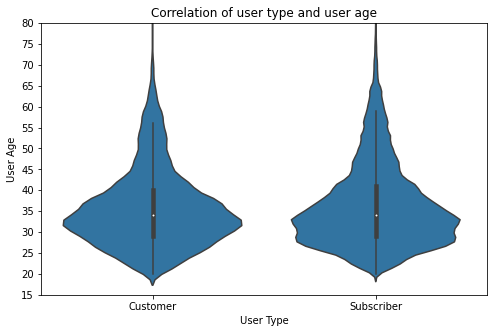

In [48]:
# set figure size
plt.figure(figsize=[8, 5])

base_color = sb.color_palette()[0]

#violin plot between user type and age
sb.violinplot(data =df_gobike, x = 'user_type', y = 'age',color=base_color)

# set ticks
plt.yticks(np.arange(15, 80+5, 5))
plt.ylim(15,80);

# labels and title
plt.title('Correlation of user type and user age')
plt.xlabel('User Type')
plt.ylabel('User Age');

Comment 14: the plot shows that the age range of Customers and subscribers are almost the same ,between 25-40.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> The number of trips are greater for Subscriber, the trip duration is greater for Customer.the plot shows that the high bike users are aged between 25 - 40, having average trip duration around 500 seconds.The number of trips are greater for weekdays, the duration in seconds is greater for weekends(Sat,Sun)

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> the plot shows that the age range of Customers and subscribers are almost the same ,between 25-40. On thursdays the number of Customers is relatively increased than the other days. Subcribers usage is decreasing during weekends rather than weekadays.The plot shows that most of the male who use the application tend to be subscribers.

## Multivariate Exploration



In [49]:
df_gobike.head(1)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,age,start_day,start_hour,start_month
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984,Male,No,37,3,17,2


Relationship between Trip duration, Age and Start hour

In [50]:
# Group by age and hour
age_hour = df_gobike.groupby(['age','start_hour']).mean().duration_sec.reset_index()

In [51]:
age_hour.describe()

,age,start_hour,duration_sec
count,1310.000000,1310.000000,1310.000000
mean,49.751145,12.099237,754.876570
std,20.100110,6.450084,632.526193
min,20.000000,0.000000,93.000000
25%,34.000000,7.000000,549.427035
50%,48.000000,12.000000,655.086877
75%,62.000000,17.000000,793.470633
max,143.000000,23.000000,11063.000000


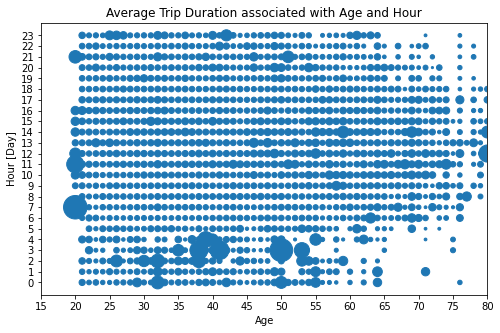

In [52]:
# set figure size
plt.figure(figsize=[8, 5])

# plot 
plt.scatter(data = age_hour, x='age', y='start_hour', s=age_hour['duration_sec']/20)

# set ticks
plt.xticks(np.arange(15, age_hour.age.max()+5, 5))
plt.yticks(range(24))
plt.xlim(15, 80)

# labels and title
plt.title('Average Trip Duration associated with Age and Hour')
plt.xlabel('Age')
plt.ylabel('Hour [Day]');

Comment 15: Users of age 20 usually do a long trip at 7am-8am ,the same observation happend but for age 40-45 at 3am.

Relationship between User Type, Gender and Trip duration.

In [53]:
# group by member_gender and user_type by mean
gender_user = df_gobike.groupby(['member_gender','user_type']).mean().duration_sec.reset_index()

In [54]:
gender_user

,member_gender,user_type,duration_sec
0,Female,Customer,1424.128055
1,Female,Subscriber,696.428031
2,Male,Customer,1253.593492
3,Male,Subscriber,616.266085
4,Other,Customer,1602.300000
5,Other,Subscriber,912.174539


In [55]:
gender_user.describe()

,duration_sec
count,6.000000
mean,1084.148367
std,402.888282
min,616.266085
25%,750.364658
50%,1082.884015
75%,1381.494414
max,1602.300000


In [56]:
# create pivot of group by in previous step
gender_user_pivot = gender_user.pivot(index='member_gender', columns='user_type', values='duration_sec')

In [57]:
gender_user_pivot

user_type,Customer,Subscriber
member_gender,,
Female,1424.128055,696.428031
Male,1253.593492,616.266085
Other,1602.300000,912.174539


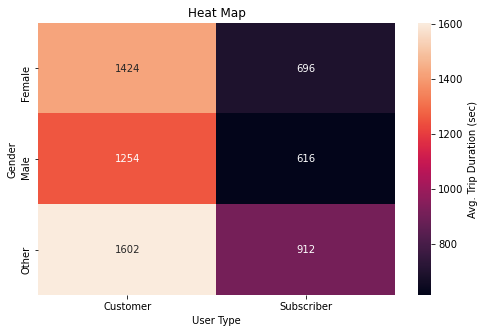

In [58]:
# set figure size
plt.figure(figsize=[8, 5])

# Heat Map Gender and User Type
sb.heatmap(gender_user_pivot, annot = True, fmt = '.0f', cbar_kws={'label': 'Avg. Trip Duration (sec)'})

# labels and title
plt.xlabel('User Type')
plt.ylabel('Gender')
plt.title('Heat Map');

comment 15: in all Gender types, higher average trip duration is contributed by Customer rather than Subscriber.

Relationship between User Type, Trip Duration and Trip Day

In [59]:
# group by trip day and user_type by mean
day_user = df_gobike.groupby(['start_day','user_type']).mean().duration_sec.reset_index()

In [60]:
day_user

,start_day,user_type,duration_sec
0,0,Customer,1366.174968
1,0,Subscriber,630.744600
2,1,Customer,1034.151675
3,1,Subscriber,622.297853
4,2,Customer,1228.843602
5,2,Subscriber,619.929587
6,3,Customer,1181.823222
7,3,Subscriber,631.469167
8,4,Customer,1114.279024
9,4,Subscriber,637.477868


In [61]:
# create pivot
day_user_pivot = day_user.pivot(index='start_day', columns='user_type', values='duration_sec')

In [62]:
day_user_pivot

user_type,Customer,Subscriber
start_day,,
0,1366.174968,630.744600
1,1034.151675,622.297853
2,1228.843602,619.929587
3,1181.823222,631.469167
4,1114.279024,637.477868
5,1642.627821,709.177898
6,1667.036973,706.505691


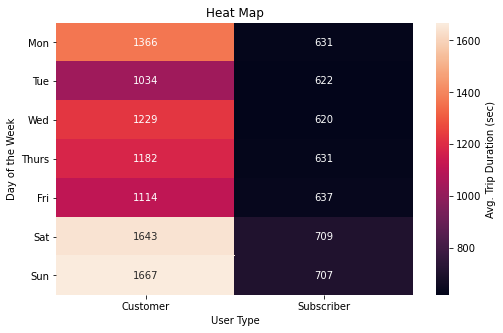

In [63]:
# set figure size
plt.figure(figsize=[8, 5])

# Heat Map Weekday and UserType
sb.heatmap(day_user_pivot, annot = True, fmt = '.0f', cbar_kws={'label': 'Avg. Trip Duration (sec)'})

# set ticks
labels = ['Mon','Tue','Wed','Thurs','Fri','Sat','Sun']
plt.yticks(np.arange(0.5, 7.5, 1), labels=labels, rotation=0)

# labels and title
plt.xlabel('User Type')
plt.ylabel('Day of the Week')
plt.title('Heat Map');

comment 16: in all day of the week, higher average trip duration is contributed by Customer rather than Subscriber.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Both Users (Customer or Subscriber) makes higher duration trips on Weekends rather than weekdays, although the number of trips are higher for weekdays. 
> The Females Subscribers have the higher trip duration, followed by Other,Male.
> The Females Customers have the high trip duration, followed by Other,Male.
> Busy hours (8am & 5pm), frequency of Subscriber trips is higher than Customer trips during morning, while in the evening frequency of Customer trips is almost equal to Subscriber trips in Week Days.

### Were there any interesting or surprising interactions between features?

> Early morning around 1am-4am, user aged 40-60 goes for high duration trips.Also, slight increase in the trip duration of users of age 25-50.
> In both Customer and Subscriber, weekends have the higher trip duration, among which Customer has the highest.
